In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,168 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [1]:
import requests, json
from tqdm import tqdm
from bs4 import BeautifulSoup
import urllib.parse as parse
import pandas as pd
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [ ]:
#@title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import cufflinks as cf
import seaborn as sns
import plotly.express as px

In [31]:
total = pd.read_csv("/content/네이버웹툰장르통합.csv")

In [32]:
total['댓글점수'] = ((total['베댓공감수']/(total['베댓공감수']+total['베댓비공감수']))*10).round(2)
#total['new_score_1'] = ((total['평점']/total['댓글점수'])*10).round(2)
total['new_score_2'] = ((total['평점']*total['댓글점수'])/10).round(2)
total['평점표준화'] = (((total['평점'] - total.mean()['평점'])/total.std()['평점'])).round(2)

#del total['new_score_1']
total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,장르,제목,회차,좋아요수,평점,평점기여자수,전체댓글수,베댓공감수,베댓비공감수,댓글점수,new_score_2,평점표준화
0,감성,드로잉레시피,1,11907,9.90,18091,1022,22928,222,9.90,9.80,0.23
1,감성,드로잉레시피,2,6629,9.96,7990,199,22644,114,9.95,9.91,0.33
2,감성,드로잉레시피,3,6348,9.97,12405,225,14435,83,9.94,9.91,0.35
3,감성,드로잉레시피,4,4967,9.97,6562,160,15462,66,9.96,9.93,0.35
4,감성,드로잉레시피,5,4614,9.97,6062,133,16099,141,9.91,9.88,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...
19651,판타지,나노머신,90,12585,9.97,14164,710,21512,376,9.83,9.80,0.35
19652,판타지,나노머신,91,11831,9.94,13516,565,29107,281,9.90,9.84,0.30
19653,판타지,나노머신,92,12431,9.97,13899,1058,39791,431,9.89,9.86,0.35
19654,판타지,나노머신,93,12320,9.97,14650,1353,38243,428,9.89,9.86,0.35


In [33]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   장르           19656 non-null  object 
 1   제목           19656 non-null  object 
 2   회차           19656 non-null  int64  
 3   좋아요수         19656 non-null  int64  
 4   평점           19656 non-null  float64
 5   평점기여자수       19656 non-null  int64  
 6   전체댓글수        19656 non-null  int64  
 7   베댓공감수        19656 non-null  int64  
 8   베댓비공감수       19656 non-null  int64  
 9   댓글점수         19547 non-null  float64
 10  new_score_2  19547 non-null  float64
 11  평점표준화        19656 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [34]:
rate_total = total[['장르','제목','평점기여자수', 'new_score_2', '평점', '평점표준화']].copy()
#rate_total['NS1_표준화'] = (((rate_total['new_score_1'] - rate_total.mean()['new_score_1'])/rate_total.std()['new_score_1'])).round(2)
rate_total['NS2_표준화'] = (((rate_total['new_score_2'] - rate_total.mean()['new_score_2'])/rate_total.std()['new_score_2'])).round(2)
rate_total['평점환산'] = rate_total['NS2_표준화']*20

#del rate_total['NS1_표준화']
#rate_total['NS2_표준화'].describe().round(2)

rate_total = rate_total[['장르', '제목', '평점기여자수', '평점', 'new_score_2','평점표준화', 'NS2_표준화', '평점환산']]
rate_total

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,장르,제목,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
0,감성,드로잉레시피,18091,9.90,9.80,0.23,0.38,7.6
1,감성,드로잉레시피,7990,9.96,9.91,0.33,0.45,9.0
2,감성,드로잉레시피,12405,9.97,9.91,0.35,0.45,9.0
3,감성,드로잉레시피,6562,9.97,9.93,0.35,0.47,9.4
4,감성,드로잉레시피,6062,9.97,9.88,0.35,0.43,8.6
...,...,...,...,...,...,...,...,...
19651,판타지,나노머신,14164,9.97,9.80,0.35,0.38,7.6
19652,판타지,나노머신,13516,9.94,9.84,0.30,0.40,8.0
19653,판타지,나노머신,13899,9.97,9.86,0.35,0.42,8.4
19654,판타지,나노머신,14650,9.97,9.86,0.35,0.42,8.4


In [35]:
rate_total.describe()

,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
count,19656.000000,19656.000000,19547.000000,19656.000000,19547.000000,19547.000000
mean,16075.132886,9.761112,9.252503,-0.000179,0.000232,0.004645
std,16490.909798,0.595381,1.454935,0.999969,1.000112,20.002248
min,52.000000,2.050000,0.000000,-12.950000,-6.360000,-127.200000
25%,4828.750000,9.870000,9.480000,0.180000,0.160000,3.200000
50%,11686.000000,9.950000,9.710000,0.320000,0.310000,6.200000
75%,21708.500000,9.970000,9.830000,0.350000,0.400000,8.000000
max,269096.000000,9.990000,9.980000,0.380000,0.500000,10.000000


실제 평점으로 환산한다면? --> 
'NS2_표준화' 양수인 경우 : 5 + 'NS2_표준화'*10
'NS2_표준화' 음수인 경우 : 5 - 'NS2_표준화'*(-0.79)


In [36]:
#rate_total['평점환산'] 

#if rate_total[rate_total['NS2_표준화'] >= 0]:
#  print(rate_total['NS2_표준화']*10)

NS_plus = rate_total[rate_total['NS2_표준화'] >= 0].copy()
NS_minus = rate_total[rate_total['NS2_표준화'] < 0].copy()
display(NS_plus)
display(NS_minus)

,장르,제목,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
0,감성,드로잉레시피,18091,9.90,9.80,0.23,0.38,7.6
1,감성,드로잉레시피,7990,9.96,9.91,0.33,0.45,9.0
2,감성,드로잉레시피,12405,9.97,9.91,0.35,0.45,9.0
3,감성,드로잉레시피,6562,9.97,9.93,0.35,0.47,9.4
4,감성,드로잉레시피,6062,9.97,9.88,0.35,0.43,8.6
...,...,...,...,...,...,...,...,...
19651,판타지,나노머신,14164,9.97,9.80,0.35,0.38,7.6
19652,판타지,나노머신,13516,9.94,9.84,0.30,0.40,8.0
19653,판타지,나노머신,13899,9.97,9.86,0.35,0.42,8.4
19654,판타지,나노머신,14650,9.97,9.86,0.35,0.42,8.4


,장르,제목,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
106,감성,밥먹고갈래요,19437,9.96,9.09,0.33,-0.11,-2.2
210,감성,밥먹고갈래요,16896,9.97,9.21,0.35,-0.03,-0.6
370,감성,움비처럼,12740,9.82,9.14,0.10,-0.08,-1.6
375,감성,움비처럼,5060,9.94,9.23,0.30,-0.02,-0.4
387,감성,움비처럼,2719,9.91,9.24,0.25,-0.01,-0.2
...,...,...,...,...,...,...,...,...
19555,판타지,낙향문사전,4937,8.66,8.42,-1.85,-0.57,-11.4
19558,판타지,낙향문사전,4022,9.78,9.17,0.03,-0.06,-1.2
19613,판타지,나노머신,15816,9.59,9.20,-0.29,-0.04,-0.8
19620,판타지,나노머신,13301,9.95,9.00,0.32,-0.17,-3.4


In [37]:
NS_plus['평점환산'] = (5 + NS_plus['NS2_표준화'] * 10).round(2)
NS_plus.describe()

,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
count,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000
mean,17523.287026,9.929721,9.719794,0.282982,0.321470,8.214701
std,16376.664036,0.072108,0.168520,0.121070,0.115928,1.159279
min,164.000000,9.310000,9.250000,-0.760000,-0.000000,5.000000
25%,6342.000000,9.920000,9.620000,0.270000,0.250000,7.500000
50%,12830.000000,9.950000,9.760000,0.320000,0.350000,8.500000
75%,23073.000000,9.970000,9.850000,0.350000,0.410000,9.100000
max,163895.000000,9.990000,9.980000,0.380000,0.500000,10.000000


In [38]:
NS_minus['평점환산'] = (5 - NS_minus['NS2_표준화'] * (0.79)).round(2)
NS_minus.describe()

,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,8949.895686,8.926481,6.778986,-1.401838,-1.700177,6.343216
std,15196.213075,1.122799,2.428714,1.885927,1.669291,1.318377
min,52.000000,2.050000,0.000000,-12.950000,-6.360000,5.010000
25%,190.000000,8.330000,4.850000,-2.400000,-3.030000,5.170000
50%,1194.000000,9.390000,7.720000,-0.620000,-1.050000,5.830000
75%,13748.250000,9.727500,8.940000,-0.055000,-0.210000,7.390000
max,269096.000000,9.980000,9.240000,0.370000,-0.010000,10.020000


In [29]:
rate_new = pd.concat([NS_plus,NS_minus])
rate_new.describe()

,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
count,19547.000000,19547.000000,19547.000000,19547.000000,19547.000000,19547.000000
mean,16160.983169,9.770307,9.252503,0.015266,0.000232,7.917324
std,16494.999159,0.582378,1.454935,0.978129,1.000112,1.369162
min,52.000000,2.050000,0.000000,-12.950000,-6.360000,5.000000
25%,4935.000000,9.880000,9.480000,0.200000,0.160000,7.000000
50%,11771.000000,9.950000,9.710000,0.320000,0.310000,8.200000
75%,21809.500000,9.970000,9.830000,0.350000,0.400000,9.000000
max,269096.000000,9.990000,9.980000,0.380000,0.500000,10.020000


In [13]:
rate_new.describe()

,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
count,19547.000000,19547.000000,19547.000000,19547.000000,19547.000000,19547.000000
mean,16160.983169,9.770307,9.252503,0.015266,0.000232,7.917324
std,16494.999159,0.582378,1.454935,0.978129,1.000112,1.369162
min,52.000000,2.050000,0.000000,-12.950000,-6.360000,5.000000
25%,4935.000000,9.880000,9.480000,0.200000,0.160000,7.000000
50%,11771.000000,9.950000,9.710000,0.320000,0.310000,8.200000
75%,21809.500000,9.970000,9.830000,0.350000,0.400000,9.000000
max,269096.000000,9.990000,9.980000,0.380000,0.500000,10.020000


In [ ]:
rate_new[rate_new['평점'] == 9.00]

,장르,제목,평점기여자수,평점,new_score_2,평점표준화,NS2_표준화,평점환산
3196,개그,와탕카,170,9.0,7.10,-1.28,-1.48,6.17
6668,무협사극,몽홀,785,9.0,7.62,-1.28,-1.12,5.88
11719,스포츠,MLB카툰,145,9.0,4.50,-1.28,-3.27,7.58
19271,판타지,더게이머,7473,9.0,8.47,-1.28,-0.54,5.43


['감성', '개그', '드라마', '무협사극', '순정', '스릴러', '스포츠', '액션', '일상', '판타지'] - 감성

In [ ]:
a = rate_new[rate_new['장르'] == '감성'].groupby('제목').mean()
a1 = a.sort_values(by='평점')
a

,평점기여자수,new_score_2,평점,평점표준화,NS2_표준화,평점환산
제목,,,,,,
드로잉레시피,4290.125000,9.910750,9.962625,0.337875,0.453625,9.536250
밥먹고갈래요,16846.625000,9.775833,9.971944,0.354583,0.359954,8.606528
연우의순정,8753.000000,9.937703,9.975676,0.360405,0.471081,9.710811
움비처럼,2985.629921,9.394291,9.895157,0.225276,0.097520,6.245315
일편단심화,1123.586957,9.176630,9.781413,0.034239,-0.052283,5.613804


In [ ]:
rcParams['font.size'] = '10'
px.bar(a1, x=a1.index, y=['평점표준화', 'NS2_표준화'], barmode='group')


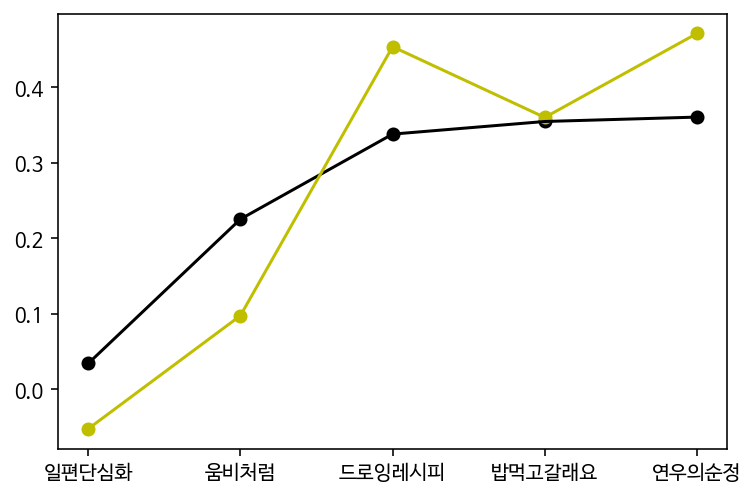

In [ ]:
plt.plot(a1.index, a1['평점표준화'], color = 'black')
plt.scatter(a1.index, a1['평점표준화'], color = 'black')
plt.plot(a1.index, a1['NS2_표준화'], color = 'y')
plt.scatter(a1.index, a1['NS2_표준화'], color = 'y')

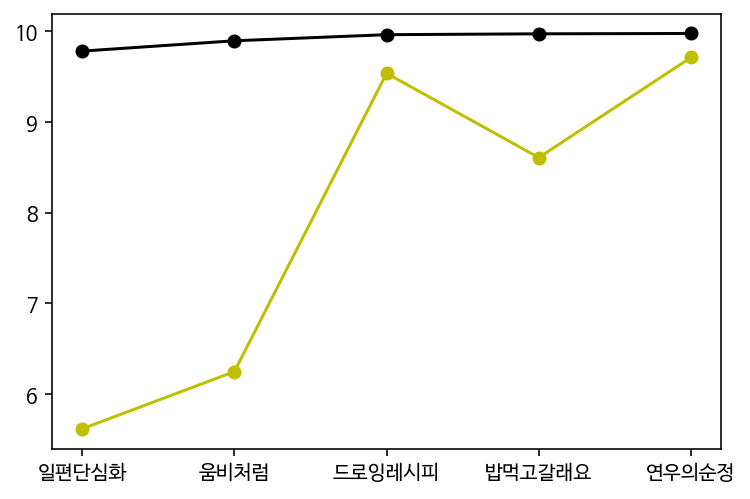

In [ ]:
plt.plot(a1.index, a1['평점'], color = 'black')
plt.scatter(a1.index, a1['평점'], color = 'black')
plt.plot(a1.index, a1['평점환산'], color = 'y')
plt.scatter(a1.index, a1['평점환산'], color = 'y')

['감성', '개그', '드라마', '무협사극', '순정', '스릴러', '스포츠', '액션', '일상', '판타지'] - 개그

In [ ]:
b = rate_new[rate_new['장르'] == '개그'].groupby('제목').mean()
b1 = b.sort_values(by='평점')
b

,평점기여자수,new_score_2,평점,평점표준화,NS2_표준화,평점환산
제목,,,,,,
와탕카,230.825779,5.551487,9.611275,-0.251516,-2.543867,7.053867
이말년씨리즈,18679.069182,9.215597,9.708050,-0.088742,-0.025409,5.919371
나쁜사람,8982.670455,9.698523,9.830114,0.115909,0.306818,8.295114
언덕위의제임스,6232.784615,9.684769,9.930523,0.284154,0.297169,8.013908
후덜덜덜남극전자,3185.565217,9.794710,9.935217,0.291739,0.372899,8.732101
가슴털로망스,3925.656934,9.813942,9.943723,0.306496,0.385839,8.858394
놓지마정신줄,7202.133333,9.755033,9.944433,0.306867,0.345333,8.460900
조선왕조실톡,19222.783562,9.644575,9.948164,0.314438,0.269699,7.835041
만물의영장,6518.720930,9.869612,9.966202,0.343488,0.424961,9.249612


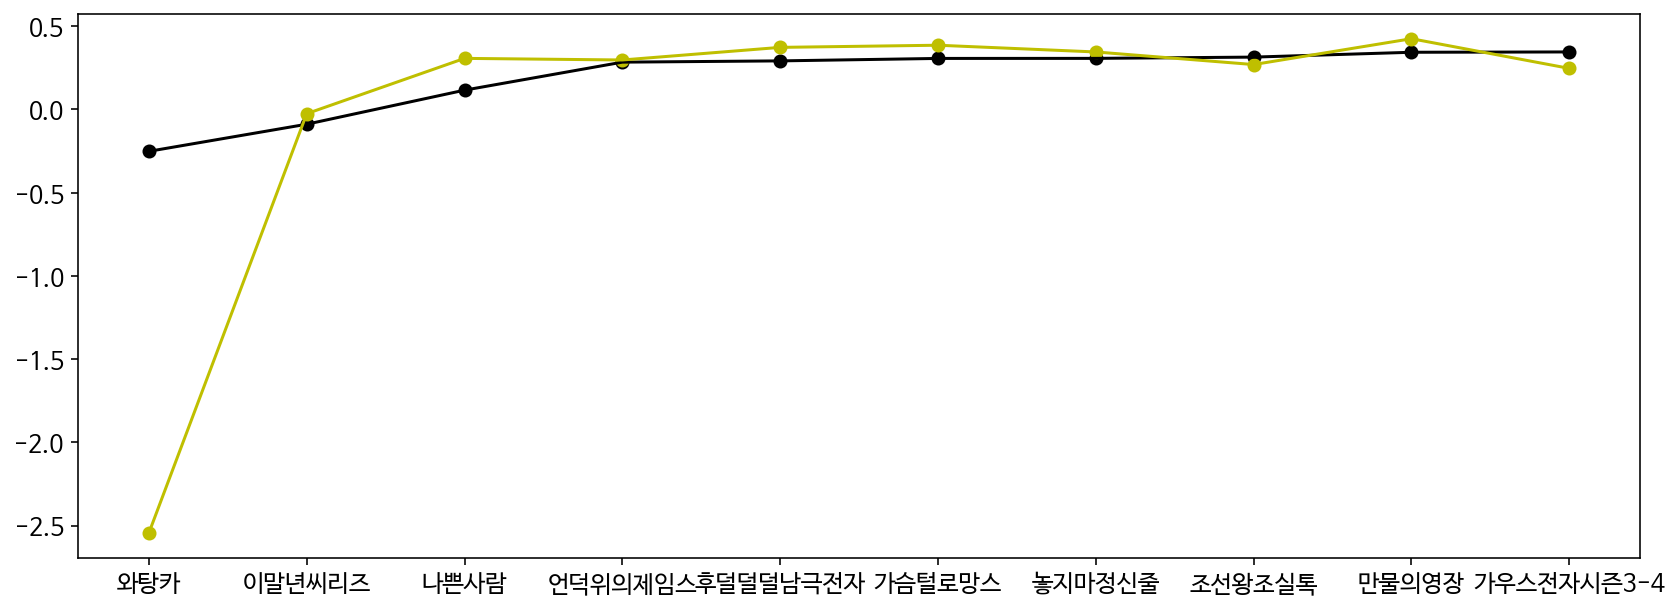

In [ ]:
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 12

plt.plot(b1.index, b1['평점표준화'], color = 'black')
plt.scatter(b1.index, b1['평점표준화'], color = 'black')

plt.plot(b1.index, b1['NS2_표준화'], color = 'y')
plt.scatter(b1.index, b1['NS2_표준화'], color = 'y')

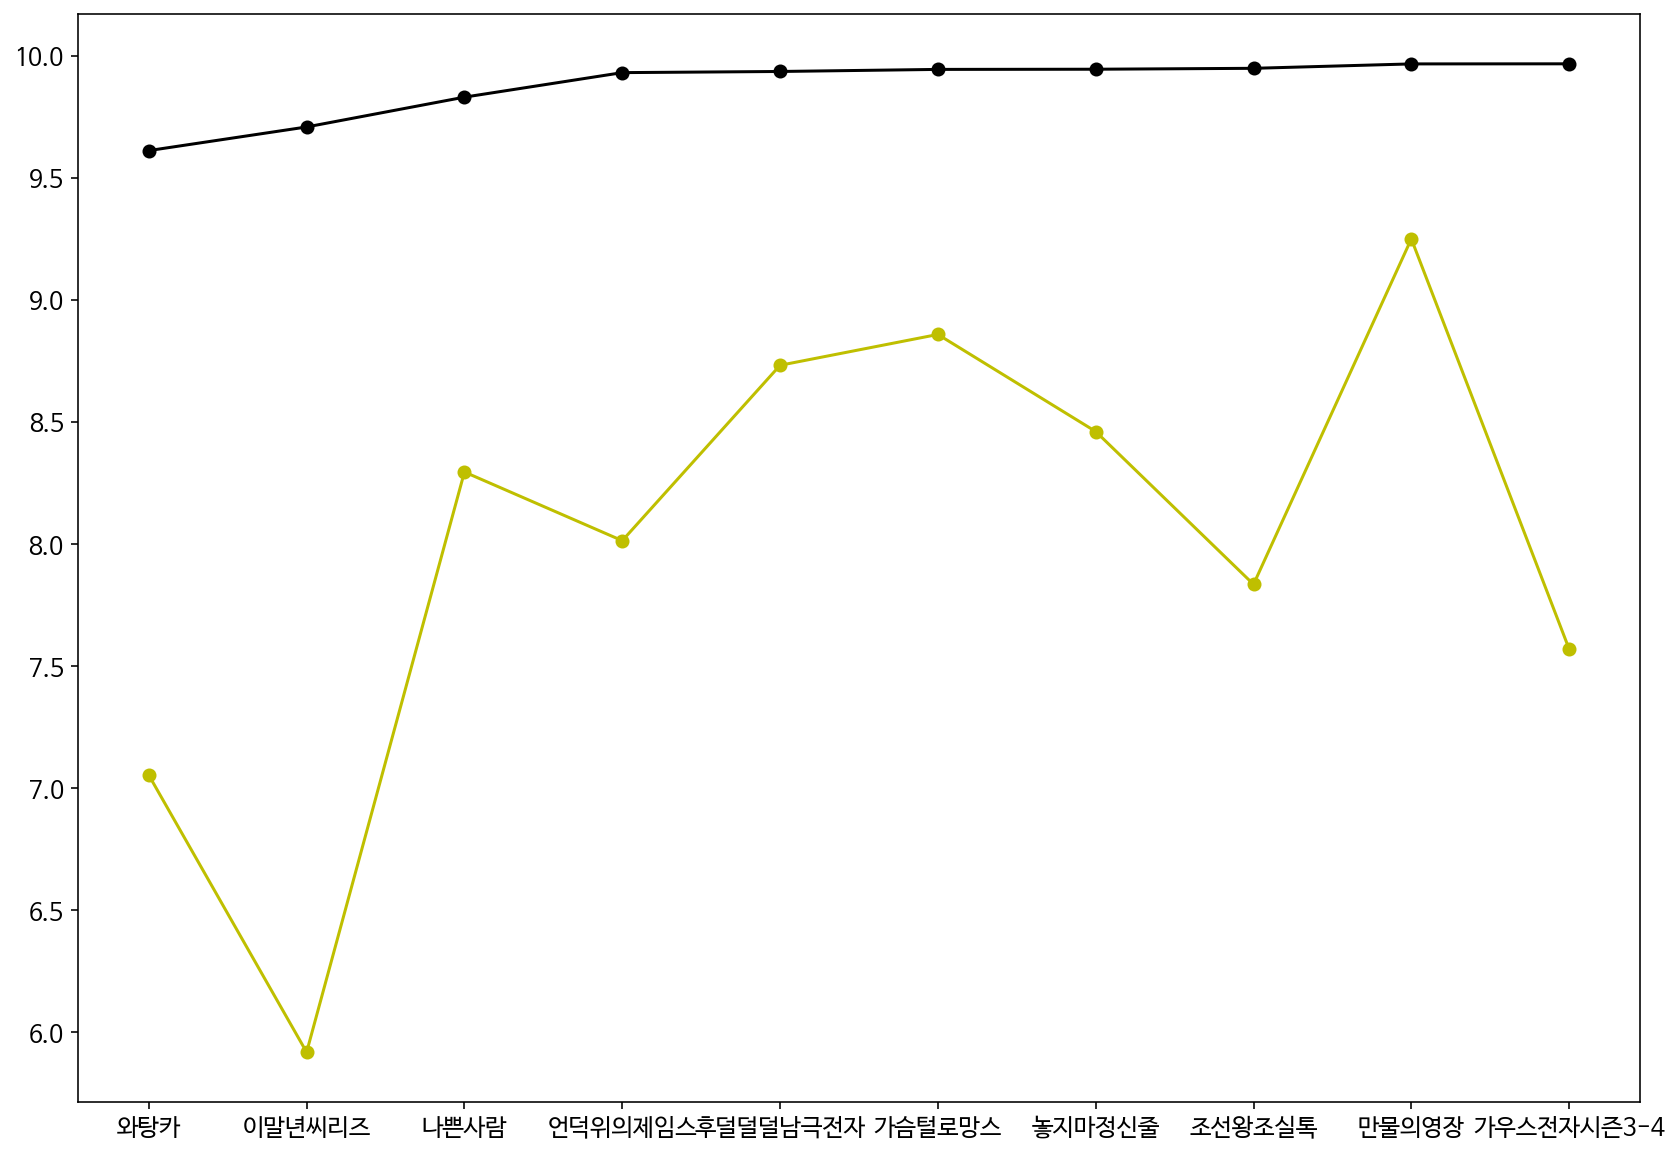

In [ ]:
rcParams['figure.figsize'] = 14, 10
rcParams['font.size'] = 12

plt.plot(b1.index, b1['평점'], color = 'black')
plt.scatter(b1.index, b1['평점'], color = 'black')
plt.plot(b1.index, b1['평점환산'], color = 'y')
plt.scatter(b1.index, b1['평점환산'], color = 'y')

['감성', '개그', '드라마', '무협사극', '순정', '스릴러', '스포츠', '액션', '일상', '판타지'] - 드라마

In [ ]:
c = rate_new[rate_new['장르'] == '개그'].groupby('제목').mean()
c1 = c.sort_values(by='평점')
c1

,평점기여자수,new_score_2,평점,평점표준화,NS2_표준화,평점환산
제목,,,,,,
와탕카,230.825779,5.551487,9.611275,-0.251516,-2.543867,7.053867
이말년씨리즈,18679.069182,9.215597,9.708050,-0.088742,-0.025409,5.919371
나쁜사람,8982.670455,9.698523,9.830114,0.115909,0.306818,8.295114
언덕위의제임스,6232.784615,9.684769,9.930523,0.284154,0.297169,8.013908
후덜덜덜남극전자,3185.565217,9.794710,9.935217,0.291739,0.372899,8.732101
가슴털로망스,3925.656934,9.813942,9.943723,0.306496,0.385839,8.858394
놓지마정신줄,7202.133333,9.755033,9.944433,0.306867,0.345333,8.460900
조선왕조실톡,19222.783562,9.644575,9.948164,0.314438,0.269699,7.835041
만물의영장,6518.720930,9.869612,9.966202,0.343488,0.424961,9.249612


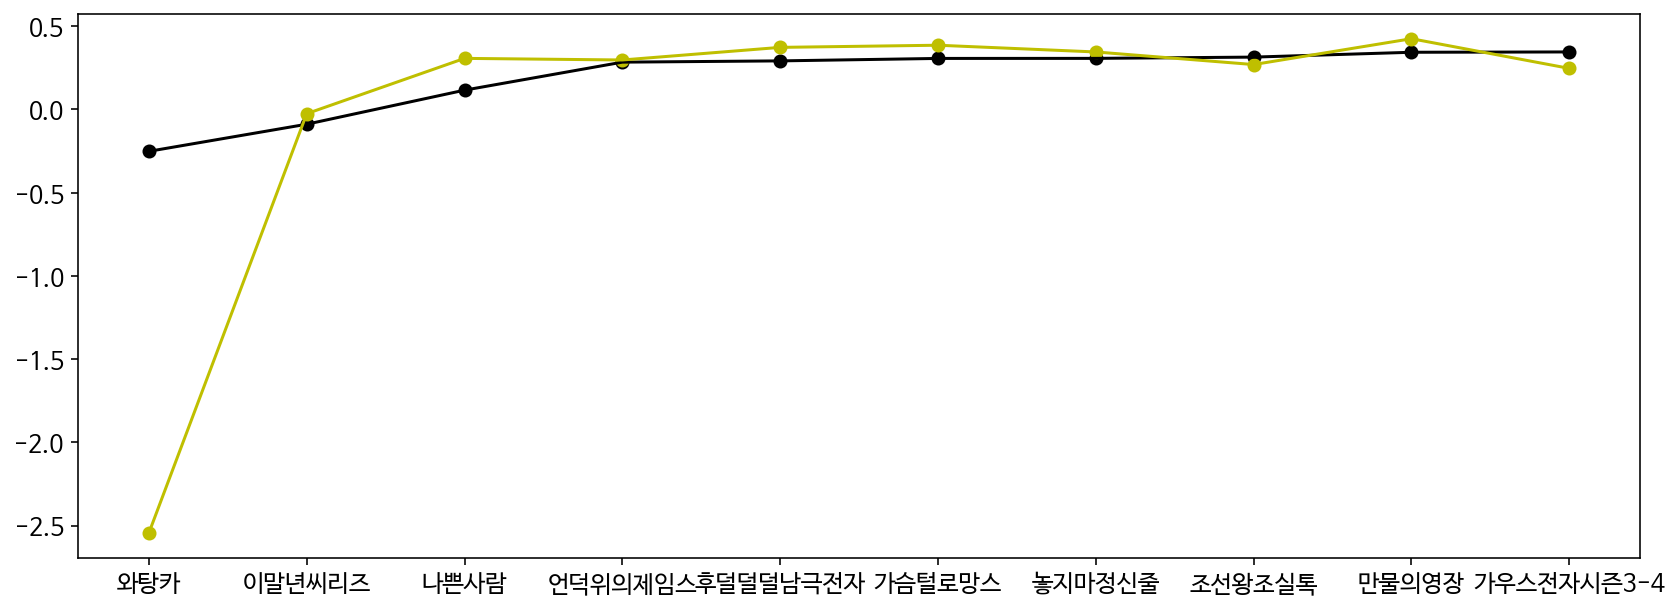

In [ ]:
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 12

plt.plot(b1.index, b1['평점표준화'], color = 'black')
plt.scatter(b1.index, b1['평점표준화'], color = 'black')

plt.plot(b1.index, b1['NS2_표준화'], color = 'y')
plt.scatter(b1.index, b1['NS2_표준화'], color = 'y')

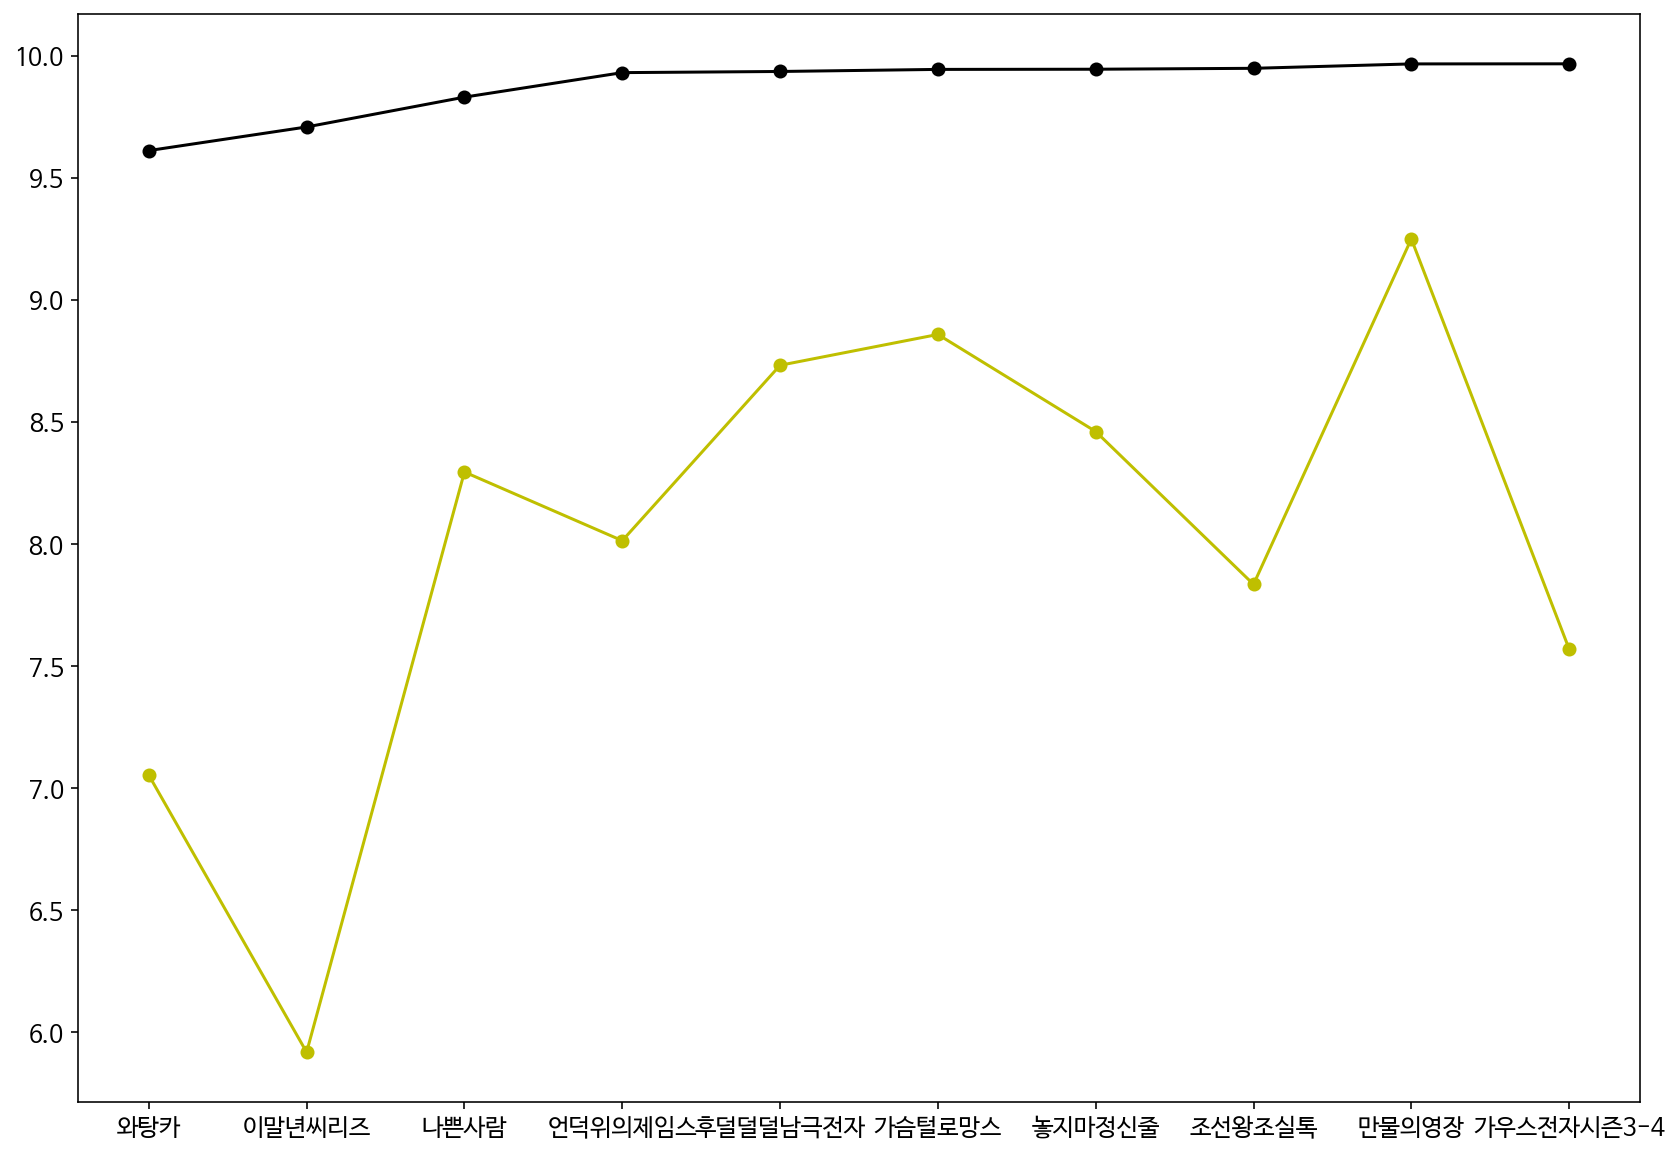

In [ ]:
rcParams['figure.figsize'] = 14, 10
rcParams['font.size'] = 12

plt.plot(b1.index, b1['평점'], color = 'black')
plt.scatter(b1.index, b1['평점'], color = 'black')
plt.plot(b1.index, b1['평점환산'], color = 'y')
plt.scatter(b1.index, b1['평점환산'], color = 'y')